In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
from google.colab import files
files.upload()  # Choose kaggle.json file you downloaded


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adnan88","key":"01c1bb664a603012dbe668e37dd3926c"}'}

In [4]:
# Set up Kaggle inside Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d lainguyn123/student-performance-factors
#https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 372MB/s]


In [6]:
!unzip student-performance-factors.zip -d /content/student_data



Archive:  student-performance-factors.zip
  inflating: /content/student_data/StudentPerformanceFactors.csv  


In [7]:
df = pd.read_csv("/content/student_data/StudentPerformanceFactors.csv")
print(df.head())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


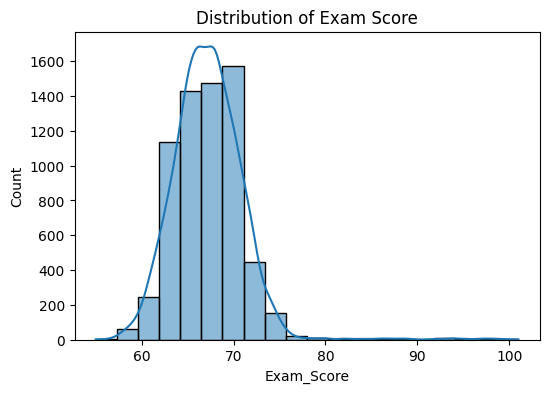

In [11]:
# Distribution of target variable (Exam_Score)
plt.figure(figsize=(6,4))
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title("Distribution of Exam Score")
plt.show()

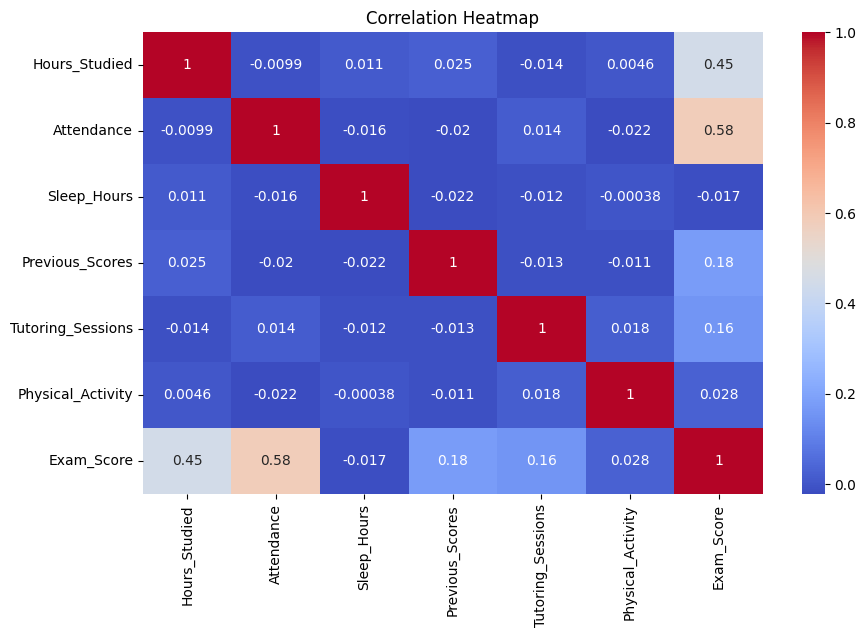

In [12]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

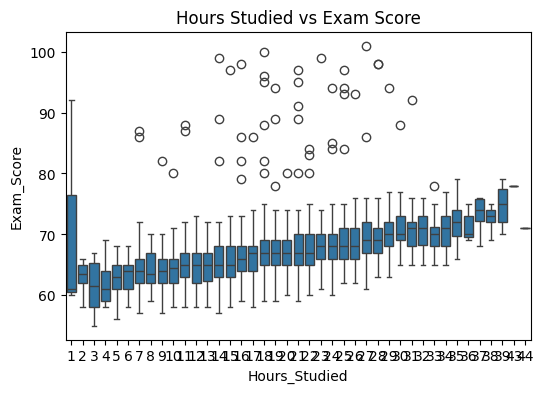

In [13]:
# Boxplot: Hours Studied vs Exam Score
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Hours_Studied'], y=df['Exam_Score'])
plt.title("Hours Studied vs Exam Score")
plt.show()

In [32]:
# Convert Exam_Score into binary target
df["Exam_Result"] = (df["Exam_Score"] >= 70).astype(int)

# Check distribution
print(df["Exam_Result"].value_counts())

Exam_Result
0    4982
1    1625
Name: count, dtype: int64


In [33]:
# Features selection (example: Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions)
X = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions"]]
y = df["Exam_Result"]

In [34]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
# Train-test split with stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [36]:
# Train logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Predictions
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8880484114977307

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1495
           1       0.81      0.71      0.76       488

    accuracy                           0.89      1983
   macro avg       0.86      0.83      0.84      1983
weighted avg       0.89      0.89      0.89      1983



In [38]:
# 1. Save artifacts (joblib)
import joblib
# assume: model, scaler, le (LabelEncoder), features list exist
# if you don't have le, recreate from training df:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder(); le.fit(df['Parental_Involvement'].astype(str))

joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "parental_le.pkl")

# Optional: save feature order so the app builds input in correct order
import json
features = ["Hours_Studied", "Attendance", "Previous_Scores", "Parental_Involvement", "Sleep_Hours"]
with open("features.json", "w") as f:
    json.dump(features, f)

# Download files to your machine (browser will prompt)
from google.colab import files
files.download("logistic_model.pkl")
files.download("scaler.pkl")
files.download("parental_le.pkl")
files.download("features.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.1 MB/s eta 0:00:00
